# Here we understand the relationship between WT contribution and model significance

Each linear model is regressed to each morphology feature according to covariate data

In [1]:
# %%--%%| <qGnYViiwRD|SyZ3qa8iz3>
r"""°°°
## Imports
°°°"""

'°°°\n## Imports\n°°°'

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## Finding the git root directory to reference paths on any system

In [3]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Defining Paths

In [4]:
output_path = Path("figures")

output_path.mkdir(
    parents=True, exist_ok=True
)  # Create the parent directories if they don't exist

output_path = (
    output_path / "feature_wt_contribution_and_significance_with_correlation.png"
)

## Import the model data as a dataframe

In [5]:
concatenated_df = pd.read_csv(
    root_dir
    / "3.interpret_models/linear_reg_plate_1_2_norm_data/feature_importances/data"
    / "feature_compartments.tsv",
    sep="\t",
)

## Plot the WT contribution for our features vs the Morphology Feature

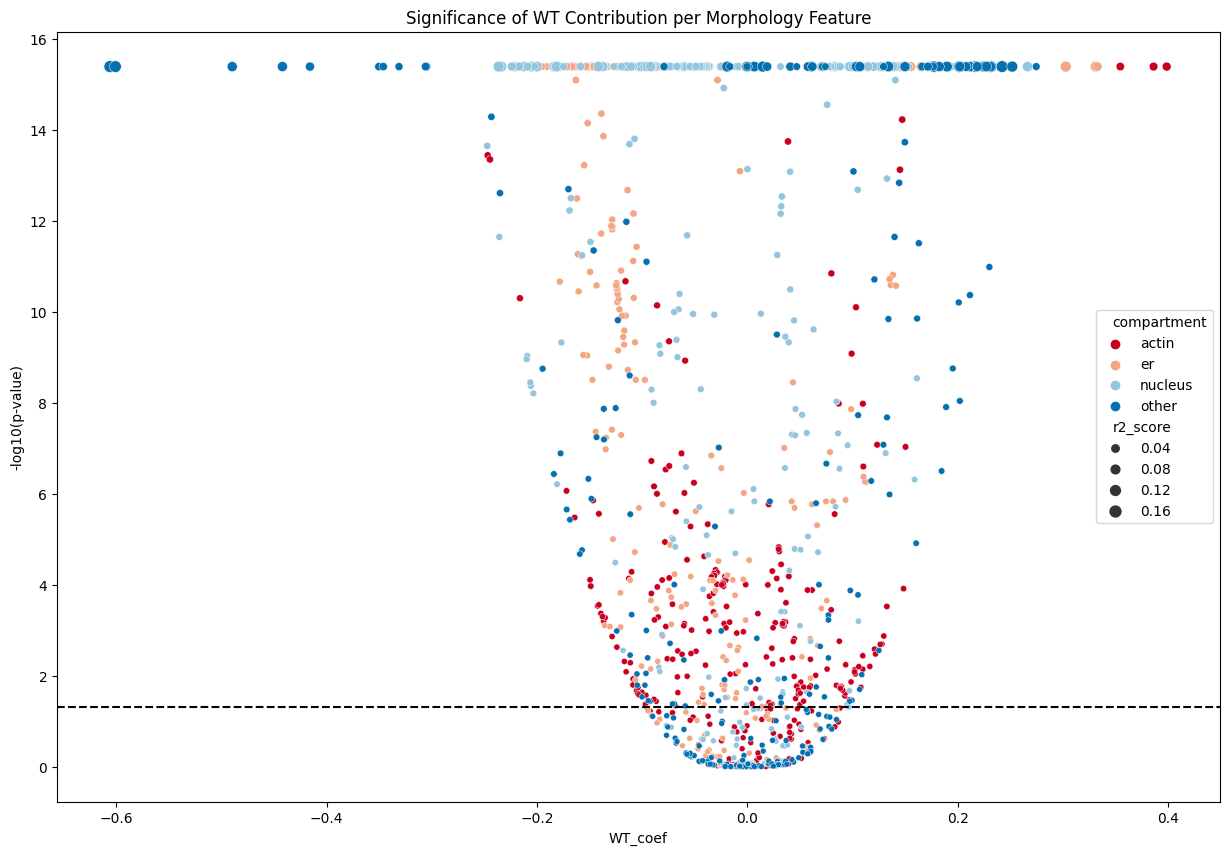

In [6]:
# Set significance threshold and fold change threshold
significance_threshold = -np.log10(0.05)
fold_change_threshold = 1.0
colors = ["#ca0020", "#f4a582", "#92c5de", "#0571b0"]

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the scatter plot with size and color differentiation
sns.scatterplot(
    data=concatenated_df,
    x="WT_coef",
    y="neg_log_p",
    size="r2_score",
    hue="compartment",
    palette=colors,
)

# Add threshold lines
plt.axhline(
    significance_threshold,
    color="black",
    linestyle="--",
    label="Significance Threshold",
)

# For adding contours:
# sns.kdeplot(data=concatenated_df, x='WT_coef', y='-log_p', levels=3, color='yellow', alpha=0.5)

# Set plot labels and title
plt.xlabel("WT_coef")
plt.ylabel("-log10(p-value)")
plt.title("Significance of WT Contribution per Morphology Feature")

# Show the plot
plt.savefig(output_path)